# 演習
DataLoaderの扱いに慣れていきましょう。  
DataLoaderのコードを書いて、データの読み込みとミニバッチ法の実装を行います。



## データの読み込み
以下のセルにコードを追記し、DataLoaderの設定を行いましょう。  
以下のセルの`mnist_train`と`mnist_test`に対してDataLoaderを設定します。  

In [13]:
import torch
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader

# 訓練データを取得
mnist_train = MNIST("./data",
                    train=True, download=True,
                    transform=transforms.ToTensor())
# テストデータの取得
mnist_test = MNIST("./data",
                   train=False, download=True,
                   transform=transforms.ToTensor())
print("訓練データの数:", len(mnist_train), "テストデータの数:", len(mnist_test))

# DataLoaderの設定
img_size = 28
batch_size = 128
# ------- 以下にコードを書く -------
train_loader=DataLoader(mnist_train,batch_size=batch_size,shuffle=True)

test_loader=DataLoader(mnist_test,batch_size=batch_size,shuffle=True)

# ------- ここまで -------

訓練データの数: 60000 テストデータの数: 10000


## モデルの構築

In [14]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(img_size*img_size, 1024)  # 全結合層
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 10)

    def forward(self, x):
        x = x.view(-1, img_size*img_size)  # バッチサイズ×入力の数
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
net.cuda()  # GPU対応
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
)


## 学習
訓練および検証の箇所にfor文のコードを追記し、DataLoaderを使ったミニバッチ法を実装しましょう。  


In [15]:
from torch import optim
import time

# 交差エントロピー誤差関数
loss_fnc = nn.CrossEntropyLoss()

# SGD
optimizer = optim.SGD(net.parameters(), lr=0.01)

# 損失のログ
record_loss_train = []
record_loss_test = []

# 学習
for i in range(10):  # 10エポック学習
    net.train()  # 訓練モード
    loss_train = 0
      # ← 左にfor文のコードを追記
    for j,(x,t) in enumerate(train_loader):
      x, t = x.cuda(), t.cuda()  # GPU対応
      y = net(x)
      loss = loss_fnc(y, t)
      loss_train += loss.item()
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
    loss_train /= j+1
    record_loss_train.append(loss_train)

    net.eval()  # 評価モード
    loss_test = 0
      # ← 左にfor文のコードを追記
    for j,(x,t) in enumerate(test_loader):
      x, t = x.cuda(), t.cuda()
      y = net(x)
      loss = loss_fnc(y, t)
      loss_test += loss.item()
    loss_test /= j+1
    record_loss_test.append(loss_test)

    if i%1 == 0:
        print("Epoch:", i, "Loss_Train:", loss_train, "Loss_Test:", loss_test)

Epoch: 0 Loss_Train: 2.025462217676614 Loss_Test: 1.4518482141856905
Epoch: 1 Loss_Train: 0.9324940148192936 Loss_Test: 0.6146588849870465
Epoch: 2 Loss_Train: 0.5382255269393229 Loss_Test: 0.4483360780190818
Epoch: 3 Loss_Train: 0.43019067713700887 Loss_Test: 0.38015913906731186
Epoch: 4 Loss_Train: 0.37950953472651905 Loss_Test: 0.3477681341427791
Epoch: 5 Loss_Train: 0.3497093023775991 Loss_Test: 0.32390912122364285
Epoch: 6 Loss_Train: 0.32847164069284507 Loss_Test: 0.3056891986840888
Epoch: 7 Loss_Train: 0.3116868464931496 Loss_Test: 0.2983759894401212
Epoch: 8 Loss_Train: 0.29795809274416235 Loss_Test: 0.281639153255692
Epoch: 9 Loss_Train: 0.28571685157350896 Loss_Test: 0.26736713799683354


## 誤差の推移

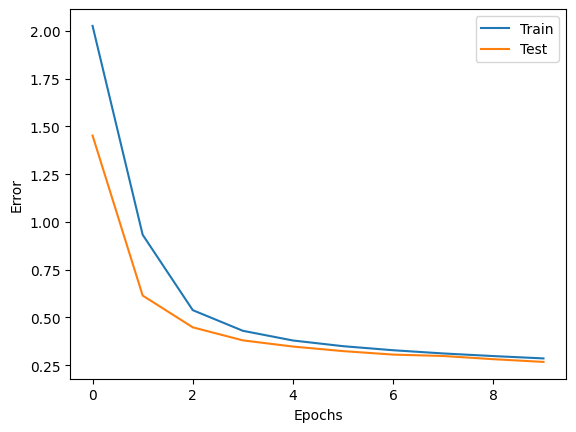

In [16]:
import matplotlib.pyplot as plt

plt.plot(range(len(record_loss_train)), record_loss_train, label="Train")
plt.plot(range(len(record_loss_test)), record_loss_test, label="Test")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

## 正解率

In [18]:
correct = 0
total = 0
for i, (x, t) in enumerate(test_loader):
    x, t = x.cuda(), t.cuda()  # GPU対応
    x = x.view(-1, img_size*img_size)
    y = net(x)
    correct += (y.argmax(1) == t).sum().item()
    total += len(x)
print("正解率:", str(correct/total*100) + "%")

正解率: 92.33%


# 解答例
以下は、どうしても手がかりがないときのみ参考にしましょう。

In [ ]:
import torch
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader

# 訓練データを取得
mnist_train = MNIST("./data",
                    train=True, download=True,
                    transform=transforms.ToTensor())
# テストデータの取得
mnist_test = MNIST("./data",
                   train=False, download=True,
                   transform=transforms.ToTensor())
print("訓練データの数:", len(mnist_train), "テストデータの数:", len(mnist_test))

# DataLoaderの設定
img_size = 28
batch_size = 128
# ------- 以下にコードを書く -------
train_loader = DataLoader(mnist_train,
                          batch_size=batch_size,
                          shuffle=True)
test_loader = DataLoader(mnist_test,
                         batch_size=batch_size,
                         shuffle=False)
# ------- ここまで -------

In [ ]:
from torch import optim
import time

# 交差エントロピー誤差関数
loss_fnc = nn.CrossEntropyLoss()

# SGD
optimizer = optim.SGD(net.parameters(), lr=0.01)

# 損失のログ
record_loss_train = []
record_loss_test = []

# 学習
for i in range(10):  # 10エポック学習
    net.train()  # 訓練モード
    loss_train = 0
    for j, (x, t) in enumerate(train_loader):  # ← 左にfor文のコードを追記
        x, t = x.cuda(), t.cuda()  # GPU対応
        y = net(x)
        loss = loss_fnc(y, t)
        loss_train += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss_train /= j+1
    record_loss_train.append(loss_train)

    net.eval()  # 評価モード
    loss_test = 0
    for j, (x, t) in enumerate(test_loader):  # ← 左にfor文のコードを追記
        x, t = x.cuda(), t.cuda()
        y = net(x)
        loss = loss_fnc(y, t)
        loss_test += loss.item()
    loss_test /= j+1
    record_loss_test.append(loss_test)

    if i%1 == 0:
        print("Epoch:", i, "Loss_Train:", loss_train, "Loss_Test:", loss_test)